<a href="https://colab.research.google.com/github/danasapir/BME3053C-Spring-2025/blob/main/HWs/Homework_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

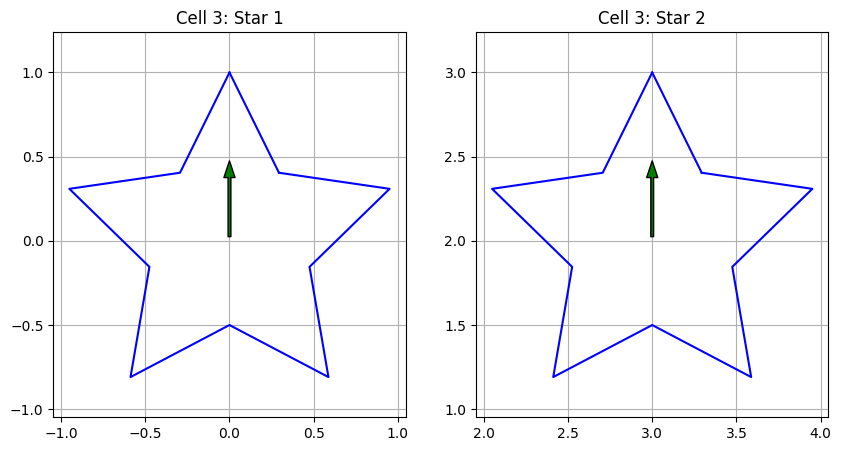

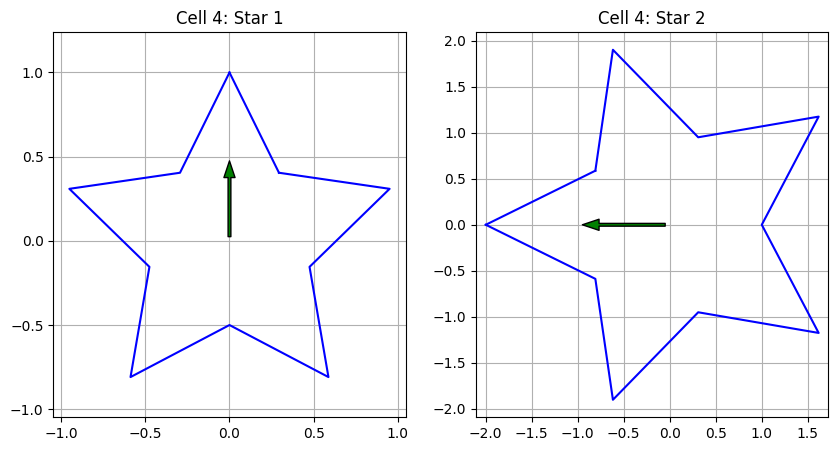

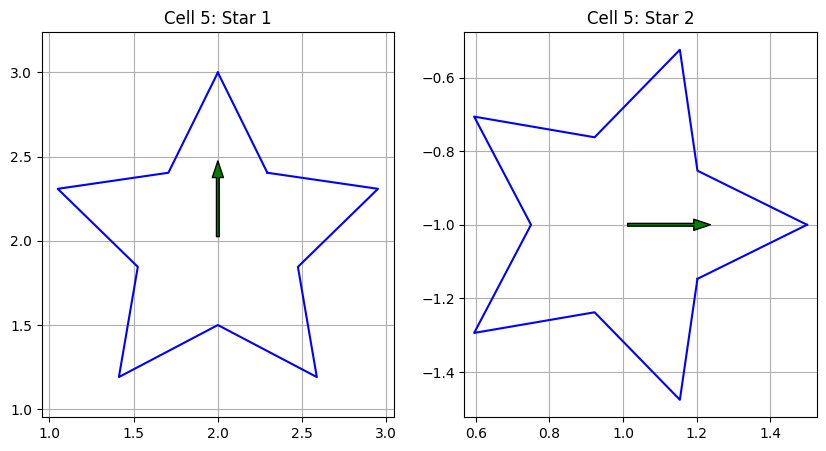

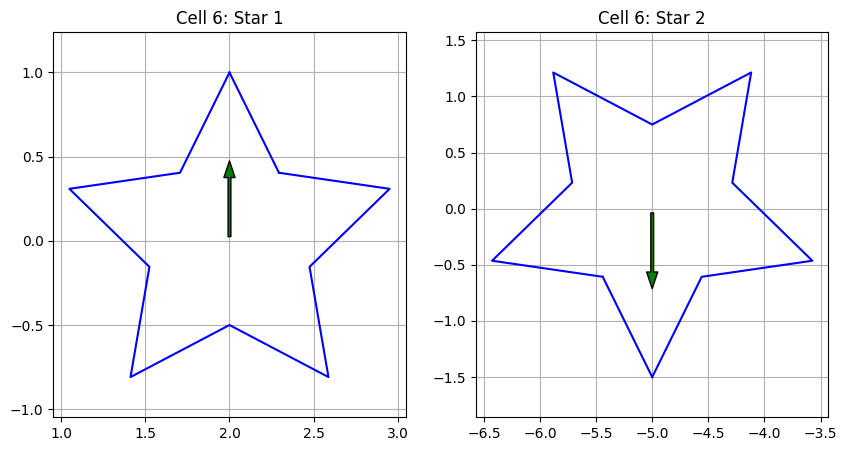

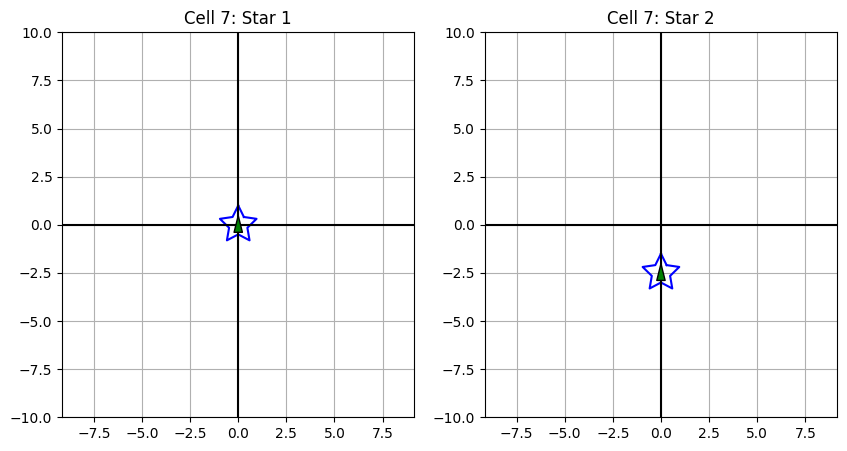

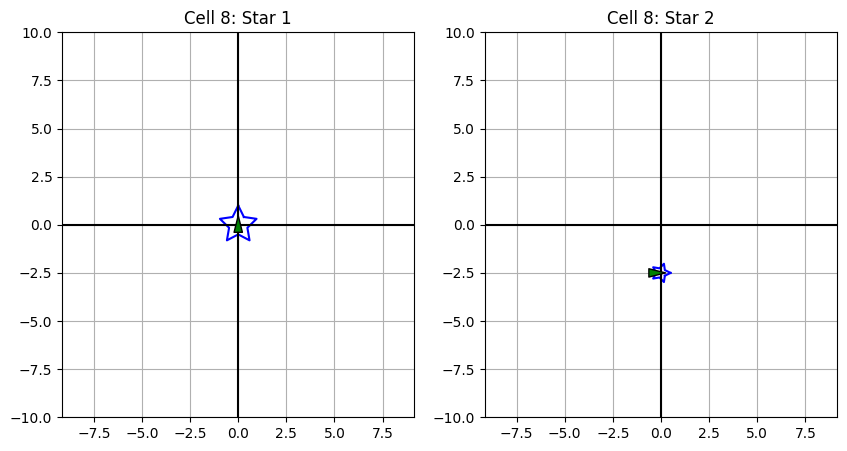

In [9]:
# Cell 1
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Cell 2
def generate_star(center=(0, 0), num_points=5, outer_radius=1, inner_radius=0.5, homogeneous=False):
    angles = np.linspace(np.pi/2, 5*np.pi/2, num_points*2, endpoint=False)
    radii = np.array([outer_radius, inner_radius] * num_points)
    x = radii * np.cos(angles) + center[0]
    y = radii * np.sin(angles) + center[1]
    return np.column_stack((x, y)) if not homogeneous else np.column_stack((x, y, np.ones(num_points*2)))

def plot_star(ax, star, title, global_view, cell_number):
    ax.plot(star[:, 0], star[:, 1], 'b-')
    ax.plot([star[-1, 0], star[0, 0]], [star[-1, 1], star[0, 1]], 'b-')
    ax.set_title(f"Cell {cell_number}: {title}")
    ax.axis('equal')
    if global_view:
        ax.set_xlim(-10,10)
        ax.set_ylim(-10,10)
        ax.axhline(0, color='black')
        ax.axvline(0, color='black')
    ax.grid(True)

    star_center = np.mean(star, axis=0)
    arrow_start = star_center
    vector_to_point = star[0] - star_center
    direction = vector_to_point/np.linalg.norm(vector_to_point)
    arrow_length = np.linalg.norm(vector_to_point)/2
    arrow_end = star_center + (arrow_length) * direction
    headwidth = 6 if global_view else 8
    width = 1 if global_view else 2
    ax.annotate('', xy=arrow_end, xytext=arrow_start,
                arrowprops=dict(facecolor='green', shrink=0.05, width=width, headwidth=headwidth))

def plot_stars(stars, global_view=False, cell_number=None):
    if len(stars) == 1 or not isinstance(stars, list):
        print("There must be a list of multiple stars to plot")
        return
    num_stars = len(stars)
    fig, axs = plt.subplots(1, num_stars, figsize=(10, 5))
    for i, star in enumerate(stars):
        plot_star(axs[i], star[:,:2], f'Star {i+1}', global_view, cell_number)

def rotate(angle_degrees):
    angle_radians = np.radians(angle_degrees)
    cos_theta = np.cos(angle_radians)
    sin_theta = np.sin(angle_radians)
    return np.array([
        [cos_theta, -sin_theta, 0],
        [sin_theta, cos_theta, 0],
        [0, 0, 1]
    ])

def scale(sx, sy):
    return np.array([
        [sx, 0, 0],
        [0, sy, 0],
        [0, 0, 1]
    ])

def translate(tx, ty):
    return np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])

# Cell 3: Two Stars at Different Positions
star1 = generate_star(center=(0, 0))
star2 = generate_star(center=(3, 2))
plot_stars([star1, star2], cell_number=3)

# Cell 4: Scaling and Rotation Transformation
star1 = generate_star(center=(0, 0))
star1_h = generate_star(center=(0, 0), homogeneous=True)
T = rotate(90) @ scale(2, 2)  # Scale by 2 in both directions, then rotate 90 degrees
star2_h = (T @ star1_h.T).T
plot_stars([star1, star2_h], cell_number=4)

# Cell 5: Scaling and Rotation Transformation
star1 = generate_star(center=(2, 2))
star1_h = generate_star(center=(2, 2), homogeneous=True)
T = translate(0, 0) @ rotate(-90) @ scale(0.5, 0.5)  # Scale by 0.5, rotate -90 degrees
star2_h = (T @ star1_h.T).T
plot_stars([star1, star2_h], cell_number=5)

# Cell 6: Combined Transformation with Scaling and Rotation
star1 = generate_star(center=(2, 0))
star1_h = generate_star(center=(2, 0), homogeneous=True)
T = translate(-2, 0) @ rotate(180) @ scale(1.5, 1.5)  # Scale (1.5, 1.5), rotate 180 degrees, translate to (0, 0)
star2_h = (T @ star1_h.T).T
plot_stars([star1, star2_h], cell_number=6)

# Cell 7: Global View with Two Stars
star1 = generate_star(center=(0, 0))
star2 = generate_star(center=(0, -2.5))
plot_stars([star1, star2], global_view=True, cell_number=7)

# Cell 8: Combined Transformation with Global View
star1 = generate_star(center=(0, 0))
star1_h = generate_star(center=(0, 0), homogeneous=True)
T = translate(0, -2.5) @ rotate(-90) @ scale(0.5, 0.5)  # Scale by 0.5, rotate -90 degrees, translate to (0, -2.5)
star2_h = (T @ star1_h.T).T
plot_stars([star1, star2_h], global_view=True, cell_number=8)